In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('data/fraud_0.1origbase.csv')

In [5]:
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,283,CASH_IN,210329.84,C1159819632,3778062.79,3988392.64,C1218876138,1519266.60,1308936.76,0,0
1,132,CASH_OUT,215489.19,C1372369468,21518.00,0.00,C467105520,6345756.55,6794954.89,0,0
2,355,DEBIT,4431.05,C1059822709,20674.00,16242.95,C76588246,80876.56,85307.61,0,0
3,135,CASH_OUT,214026.20,C1464960643,46909.73,0.00,C1059379810,13467450.36,13681476.56,0,0
4,381,CASH_OUT,8858.45,C831134427,0.00,0.00,C579876929,1667180.58,1676039.03,0,0


## 1. Columns

**step:** maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

**type:** CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount:** amount of the transaction in local currency.

**nameOrig:** customer who started the transaction

**oldbalanceOrg:** initial balance before the transaction

**newbalanceOrig:** new balance after the transaction

**nameDest:** customer who is the recipient of the transaction

**oldbalanceDest:** initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

**newbalanceDest:** new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

**isFraud:** This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

**isFlaggedFraud:** The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [6]:
!pip install inflection
import sys
!{sys.executable} -m pip install inflection



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [7]:
import inflection # a Python package that helps with string transformations (e.g., CamelCase → snake_case).
cols_old = df1.columns.tolist()

snakecase = lambda x: inflection.underscore(x)
cols_new = list(map(snakecase, cols_old))

df1.columns = cols_new

In [8]:
df1.columns

Index(['step', 'type', 'amount', 'name_orig', 'oldbalance_org',
       'newbalance_orig', 'name_dest', 'oldbalance_dest', 'newbalance_dest',
       'is_fraud', 'is_flagged_fraud'],
      dtype='object')

## Shape and Dimenstion

In [9]:
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

Number of Rows: 636262
Number of Cols: 11


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636262 entries, 0 to 636261
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   step              636262 non-null  int64  
 1   type              636262 non-null  object 
 2   amount            636262 non-null  float64
 3   name_orig         636262 non-null  object 
 4   oldbalance_org    636262 non-null  float64
 5   newbalance_orig   636262 non-null  float64
 6   name_dest         636262 non-null  object 
 7   oldbalance_dest   636262 non-null  float64
 8   newbalance_dest   636262 non-null  float64
 9   is_fraud          636262 non-null  int64  
 10  is_flagged_fraud  636262 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 53.4+ MB


In [11]:
df1.isna().mean()

step                0.0
type                0.0
amount              0.0
name_orig           0.0
oldbalance_org      0.0
newbalance_orig     0.0
name_dest           0.0
oldbalance_dest     0.0
newbalance_dest     0.0
is_fraud            0.0
is_flagged_fraud    0.0
dtype: float64

## Change Data Type
 I will change the values 0 and 1 to 'yes' and 'no'. It'll help on the data description and analysis sections.

In [12]:
df1['is_fraud'] = df1['is_fraud'].map({1: 'yes', 0: 'no'})
df1['is_flagged_fraud'] = df1['is_flagged_fraud'].map({1: 'yes', 0: 'no'})

## Description Statistics

In [13]:
num_attributes = df1.select_dtypes(exclude='object')
cat_attributes = df1.select_dtypes(include='object')

In [14]:
cat_attributes.head()

,type,name_orig,name_dest,is_fraud,is_flagged_fraud
0,CASH_IN,C1159819632,C1218876138,no,no
1,CASH_OUT,C1372369468,C467105520,no,no
2,DEBIT,C1059822709,C76588246,no,no
3,CASH_OUT,C1464960643,C1059379810,no,no
4,CASH_OUT,C831134427,C579876929,no,no


In [15]:
num_attributes.head()

,step,amount,oldbalance_org,newbalance_orig,oldbalance_dest,newbalance_dest
0,283,210329.84,3778062.79,3988392.64,1519266.60,1308936.76
1,132,215489.19,21518.00,0.00,6345756.55,6794954.89
2,355,4431.05,20674.00,16242.95,80876.56,85307.61
3,135,214026.20,46909.73,0.00,13467450.36,13681476.56
4,381,8858.45,0.00,0.00,1667180.58,1676039.03


In [16]:
from scipy   import stats
describe = num_attributes.describe().T

describe['range'] = (num_attributes.max() - num_attributes.min()).tolist()
describe['variation coefficient'] = (num_attributes.std() / num_attributes.mean()).tolist()
describe['skew'] = num_attributes.skew().tolist()
describe['kurtosis'] = num_attributes.kurtosis().tolist()

describe

,count,mean,std,min,25%,50%,75%,max,range,variation coefficient,skew,kurtosis
step,636262.0,2.429319e+02,1.423309e+02,1.0,155.000,238.000,3.340000e+02,7.420000e+02,7.410000e+02,0.585888,0.375052,0.324437
amount,636262.0,1.800585e+05,6.069714e+05,0.0,13407.425,74815.770,2.084988e+05,5.722962e+07,5.722962e+07,3.370967,29.577107,1546.661043
oldbalance_org,636262.0,8.317937e+05,2.885636e+06,0.0,0.000,14239.000,1.072998e+05,4.368662e+07,4.368662e+07,3.469173,5.243428,32.766036
newbalance_orig,636262.0,8.528354e+05,2.921296e+06,0.0,0.000,0.000,1.435652e+05,4.367380e+07,4.367380e+07,3.425393,5.173614,31.932547
oldbalance_dest,636262.0,1.096212e+06,3.375389e+06,0.0,0.000,131539.745,9.384820e+05,3.551855e+08,3.551855e+08,3.079138,20.622388,1074.335293
newbalance_dest,636262.0,1.221809e+06,3.656213e+06,0.0,0.000,214712.725,1.109230e+06,3.555534e+08,3.555534e+08,2.992460,19.623903,928.694204


* All the data has a coeficient of variation greater than 25%, therefore they aren't homogeneous.

* The step variable starts from 1 hour to 742 hour (30 days).

* Some variables are higher shap and right skewed.

* 50% of the newbalance_orig is 0. Maybe there are some transfers that don't go to the destination.

* The skew is higher positive, therefore the values may be in less values.

Categorical attributes description

In [17]:
cat_attributes.describe()

,type,name_orig,name_dest,is_fraud,is_flagged_fraud
count,636262,636262,636262,636262,636262
unique,5,636171,457224,2,2
top,CASH_OUT,C1785652992,C1023714065,no,no
freq,224216,2,14,635441,636260


* The majority type is cash_out with 2237500.

* There's a lot of variability in name_orig, so it could be hard to use one hot encoding.

* There's less name_orig than name_dest. There's more users sending than receiving, however use one hot encoding will not help.

* There's more fraud than the flagged fraud, it shows that the current method can't recognize fraud efficiently.

## Mind-Map

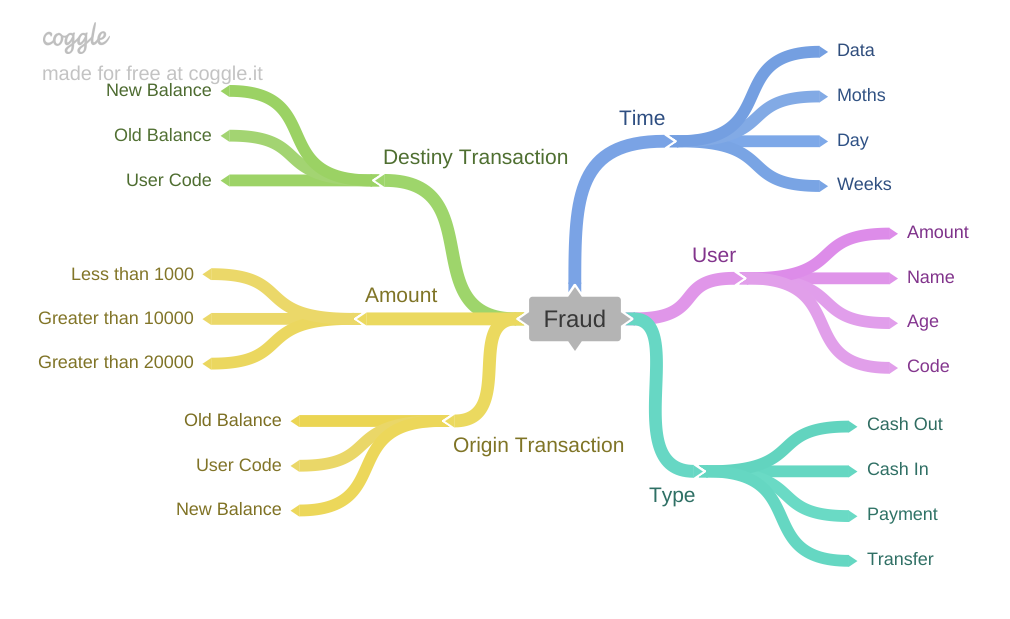

In [18]:
from IPython.display import Image

Image('data/Fraud-mindmap.png')


In [19]:
df2 = df1.copy()

## Hypothesis Creation

# User
* 90% of the twentyone-year-old users did a fraud transiction.

* The majority fraud transiction occours for the same initial letter user.

* The fraud amount is greater than 10.000.

* The 60% of the age is greater than 30 year old.

# Type 
* 60% of fraud transaction occours using cash-out-type method.

* The majority transfers occours using tranfers-type method.

* Values greater than 100.000 occours using transfers-type method.

* Payment type occurs with values lower than 100.000

# Origin and Destiny Transaction
* 60% of the difference between origin destiny transactions is equal 0 for frauds.

* Origin values are greater than destiny values for fraud transaction.

# Time
* Fraud transactions occours at least in 3 days.

* 40% of the cash-out transactions occours less than 1 day.

* 60% of the transaction less than 100.000 occours at least 10 days.

* The transactions greater than 10.000 occours at most in 2 weeks.

# Hypothesis List
1. The majority fraud transiction occours for the same initial letter user.

1. All the fraud amount is greater than 10.000.

1. 60% of fraud transaction occours using cash-out-type method.

1. The majority transfers occours using tranfers-type method.

1. Fraud transactions occours at least in 3 days.

# Feature Engineering

In [20]:
# step
df2['step_days'] = df2['step'].apply(lambda i: i/24)
df2['step_weeks'] = df2['step'].apply(lambda i: i/(24*7))

# difference between initial balance before the transaction and new balance after the transaction
df2['diff_new_old_balance'] = df2['newbalance_orig'] - df2['oldbalance_org']

# difference between initial balance recipient before the transaction and new balance recipient after the transaction.
df2['diff_new_old_destiny'] = df2['newbalance_dest'] - df2['oldbalance_dest']

# name orig and name dest
df2['name_orig'] = df2['name_orig'].apply(lambda i: i[0])
df2['name_dest'] = df2['name_dest'].apply(lambda i: i[0])

# EDA (Exploratory Data Analysis)

In [21]:
df4 = df2.copy()

# Univariate Analysis

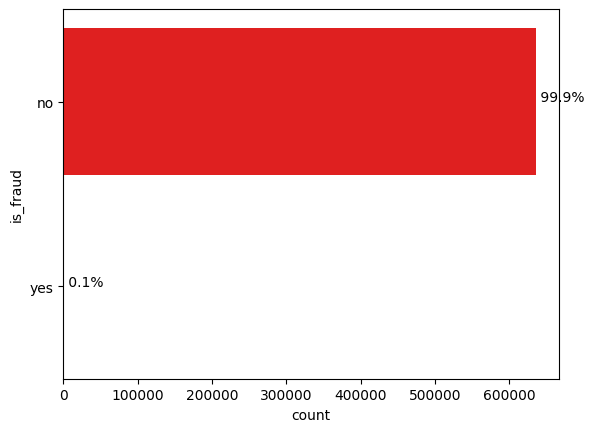

In [22]:
import seaborn as sns
ax = sns.countplot(y='is_fraud', data=df4,color='red');

total = df4['is_fraud'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    sns.set(font_scale=1.6)
    
    # plt.style.use('seaborn-darkgrid')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 16
    
    # display( HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option('display.expand_frame_repr', False)
    
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


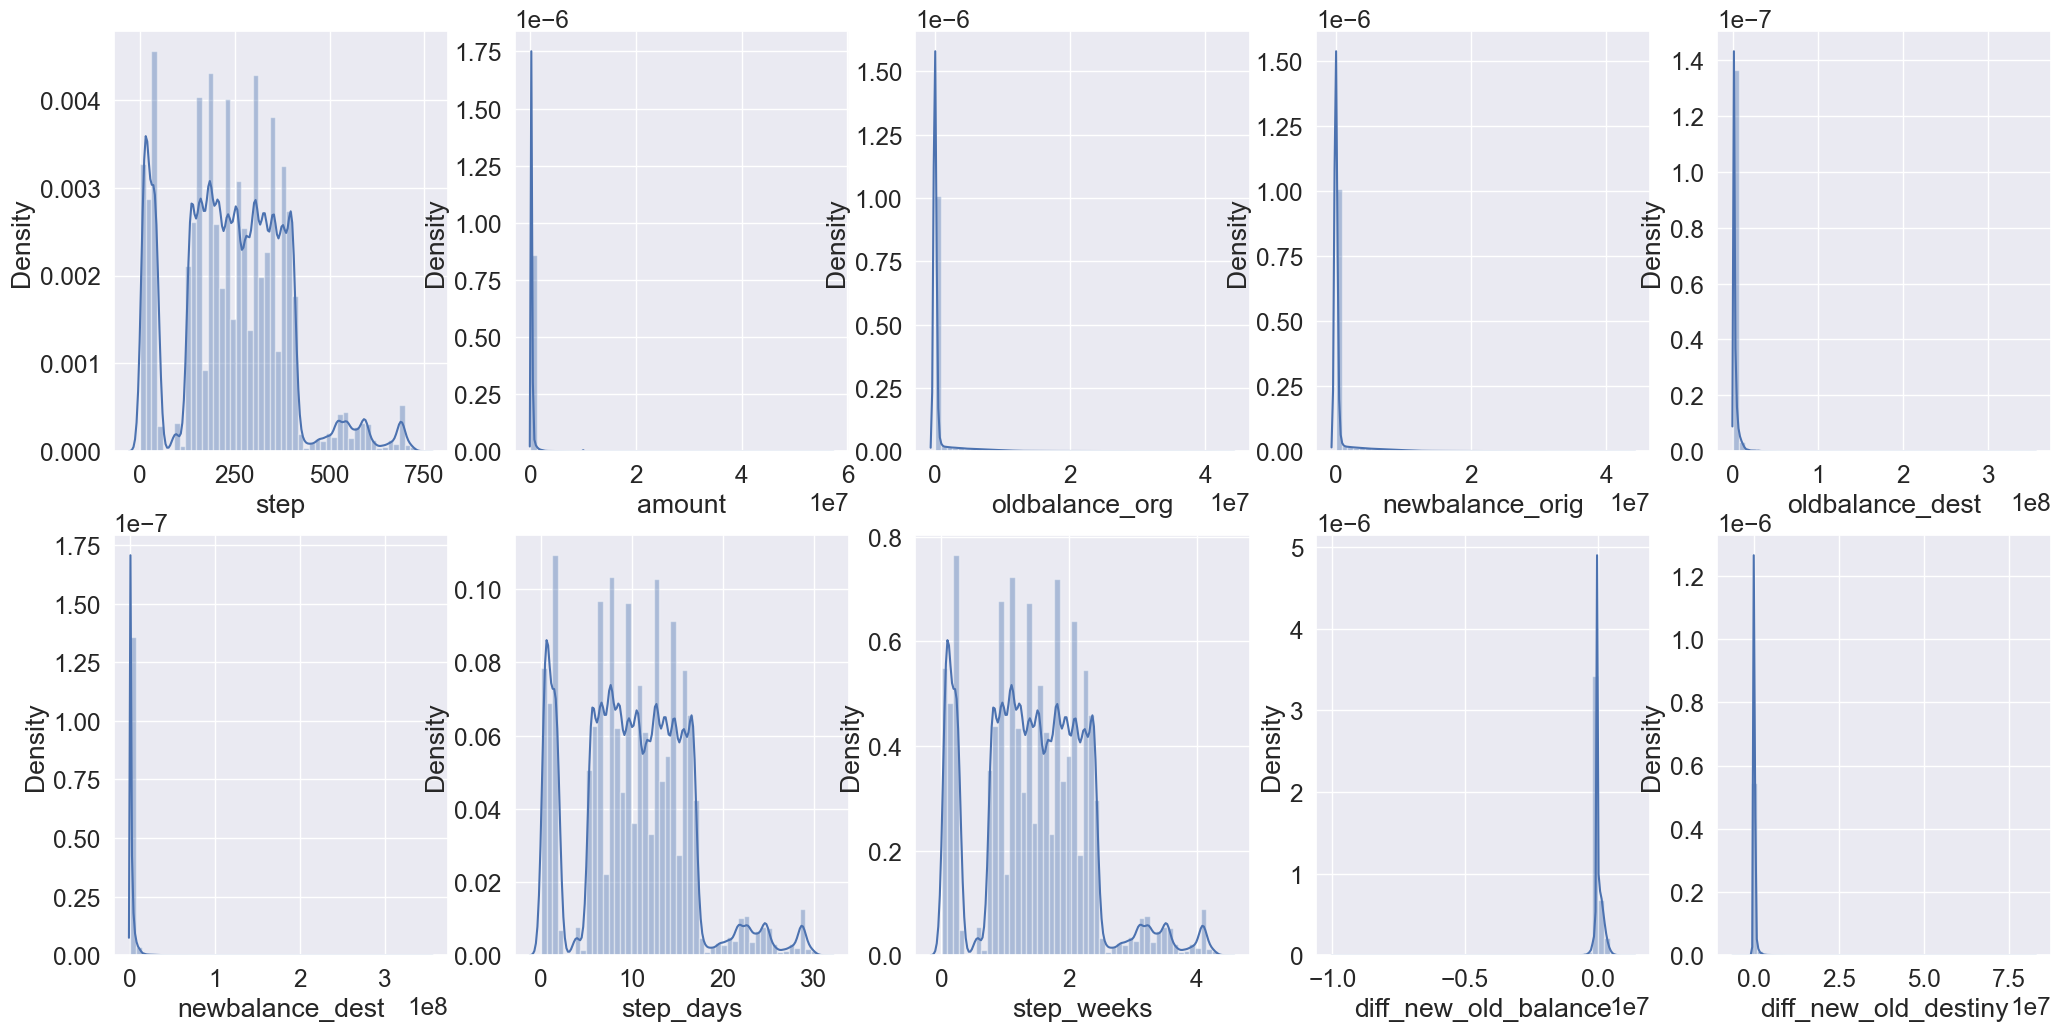

In [25]:
# Numerical variables
num_attributes = df4.select_dtypes(exclude='object')
columns = num_attributes.columns.tolist()
j = 1

for column in columns:
    plt.subplot(2, 5, j)
    sns.distplot(num_attributes[column]);
    
    j += 1

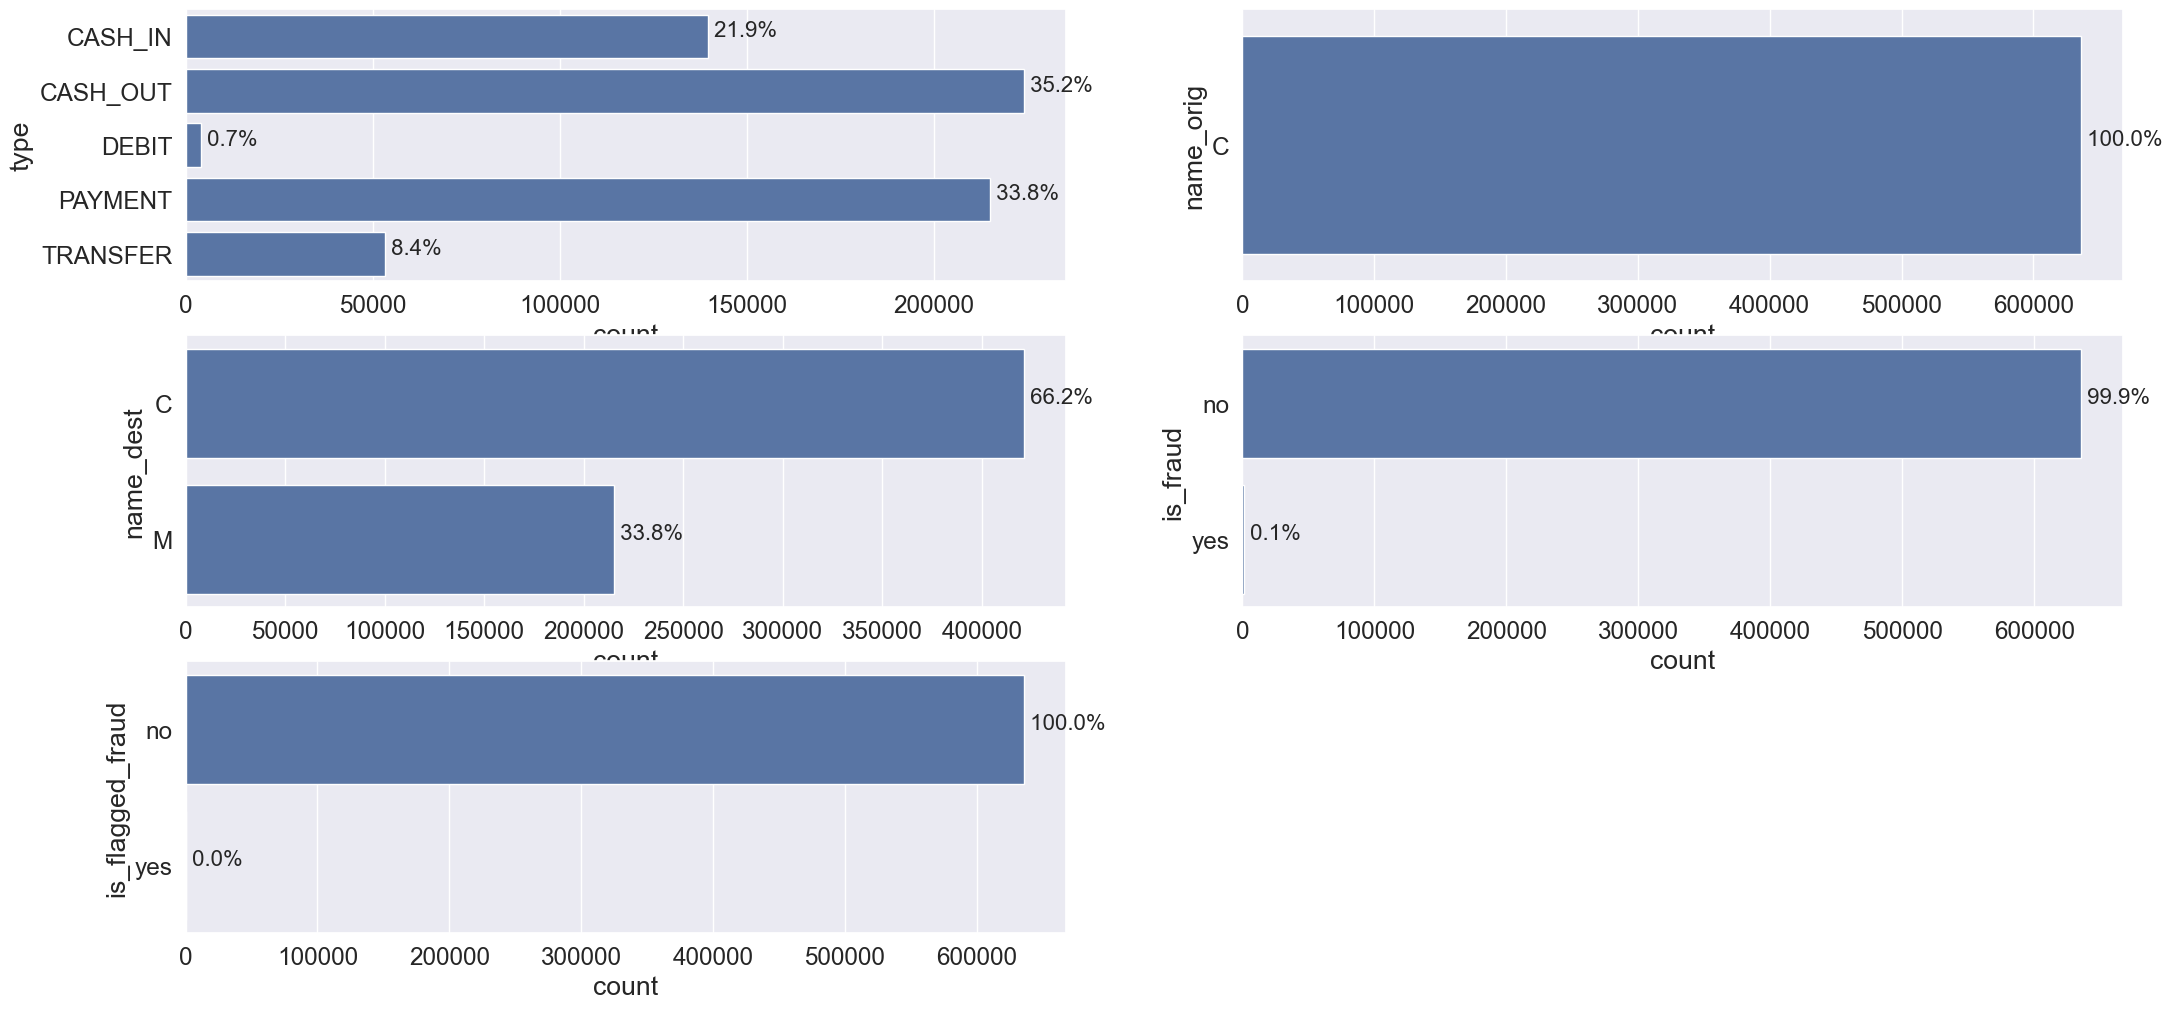

In [26]:
# Categorical Variables
cat_attributes = df4.select_dtypes(include='object')
columns = cat_attributes.columns.tolist()
j = 1

for column in columns:
    plt.subplot(3, 2, j)
    ax = sns.countplot(y=column, data=cat_attributes)
    
    total = cat_attributes[column].size
    for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
    
    j += 1

# Bivariate Analysis

### H1 The majority fraud transiction occours for the same user.
**TRUE:** The same user origem and destiny has got the same inital letter.

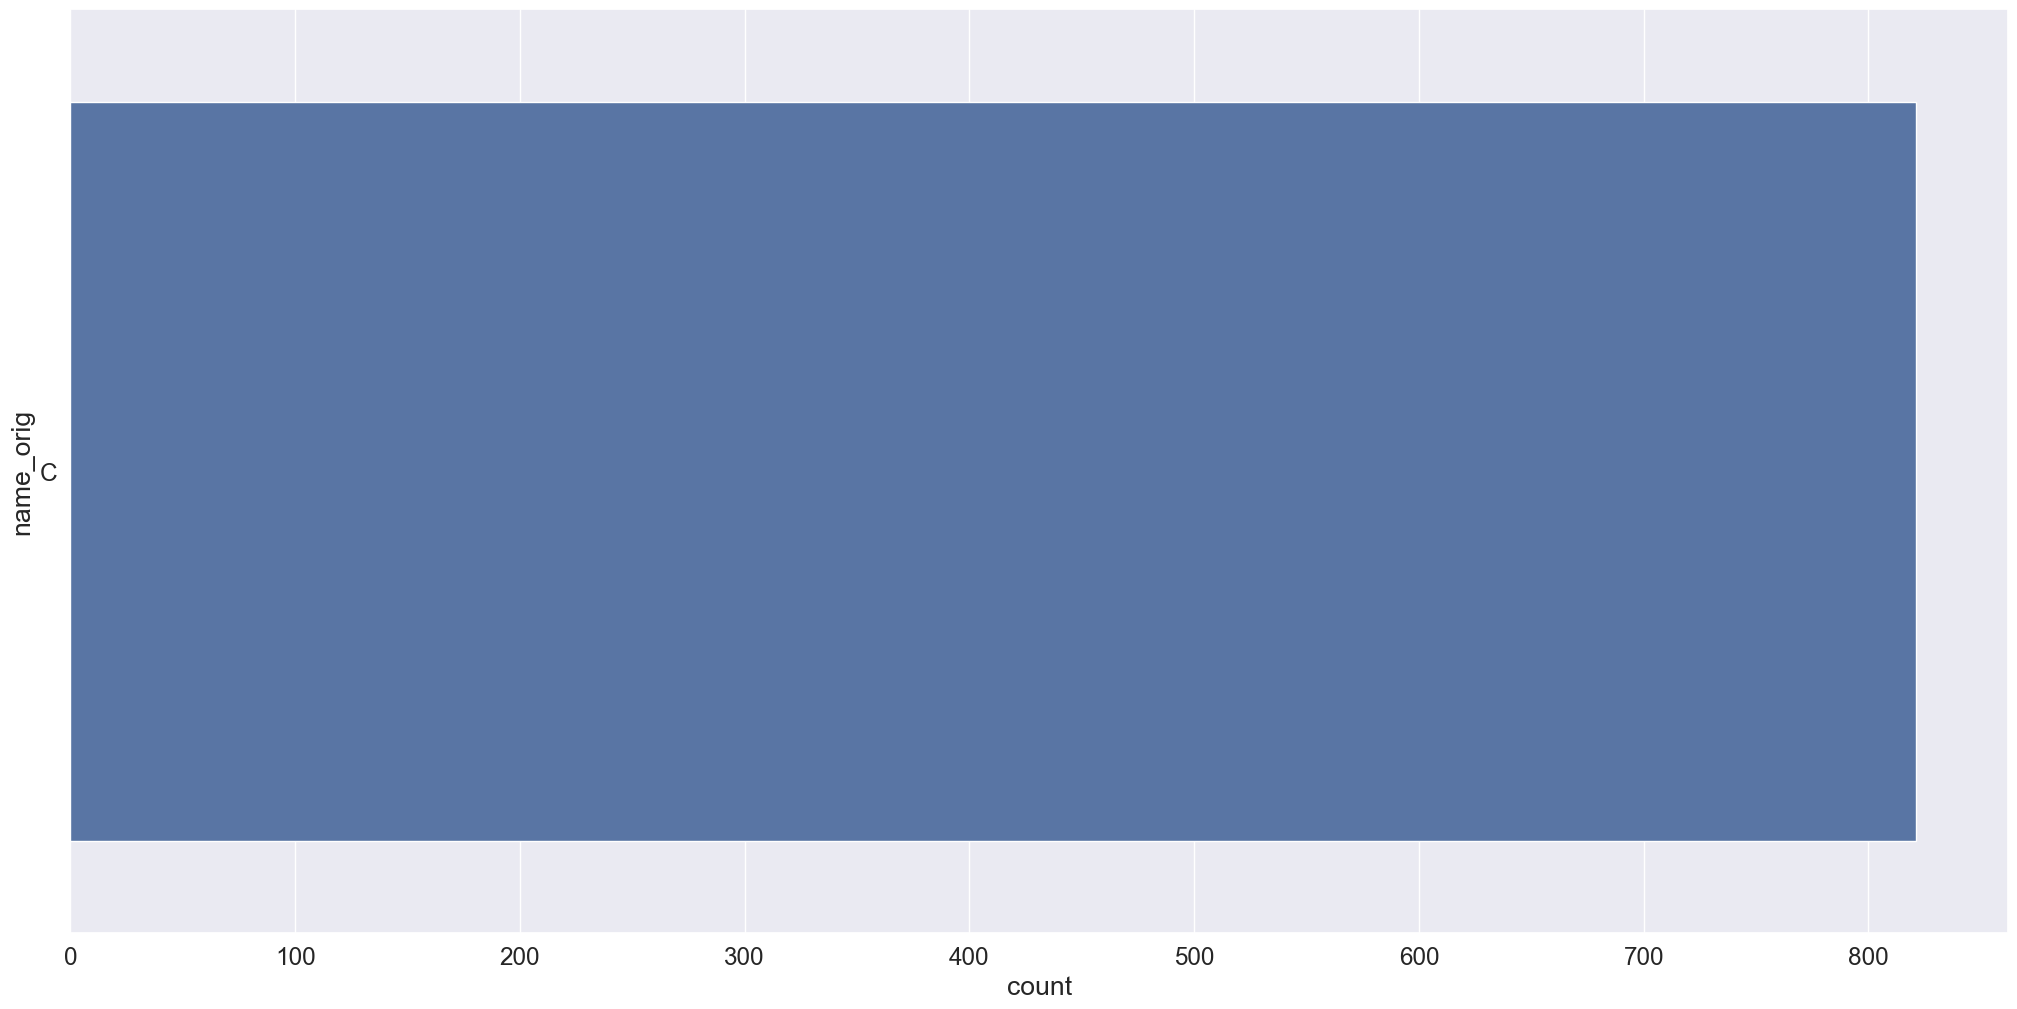

In [27]:
aux1 = df4[df4['is_fraud'] == 'yes']
sns.countplot(y='name_orig', data=aux1);

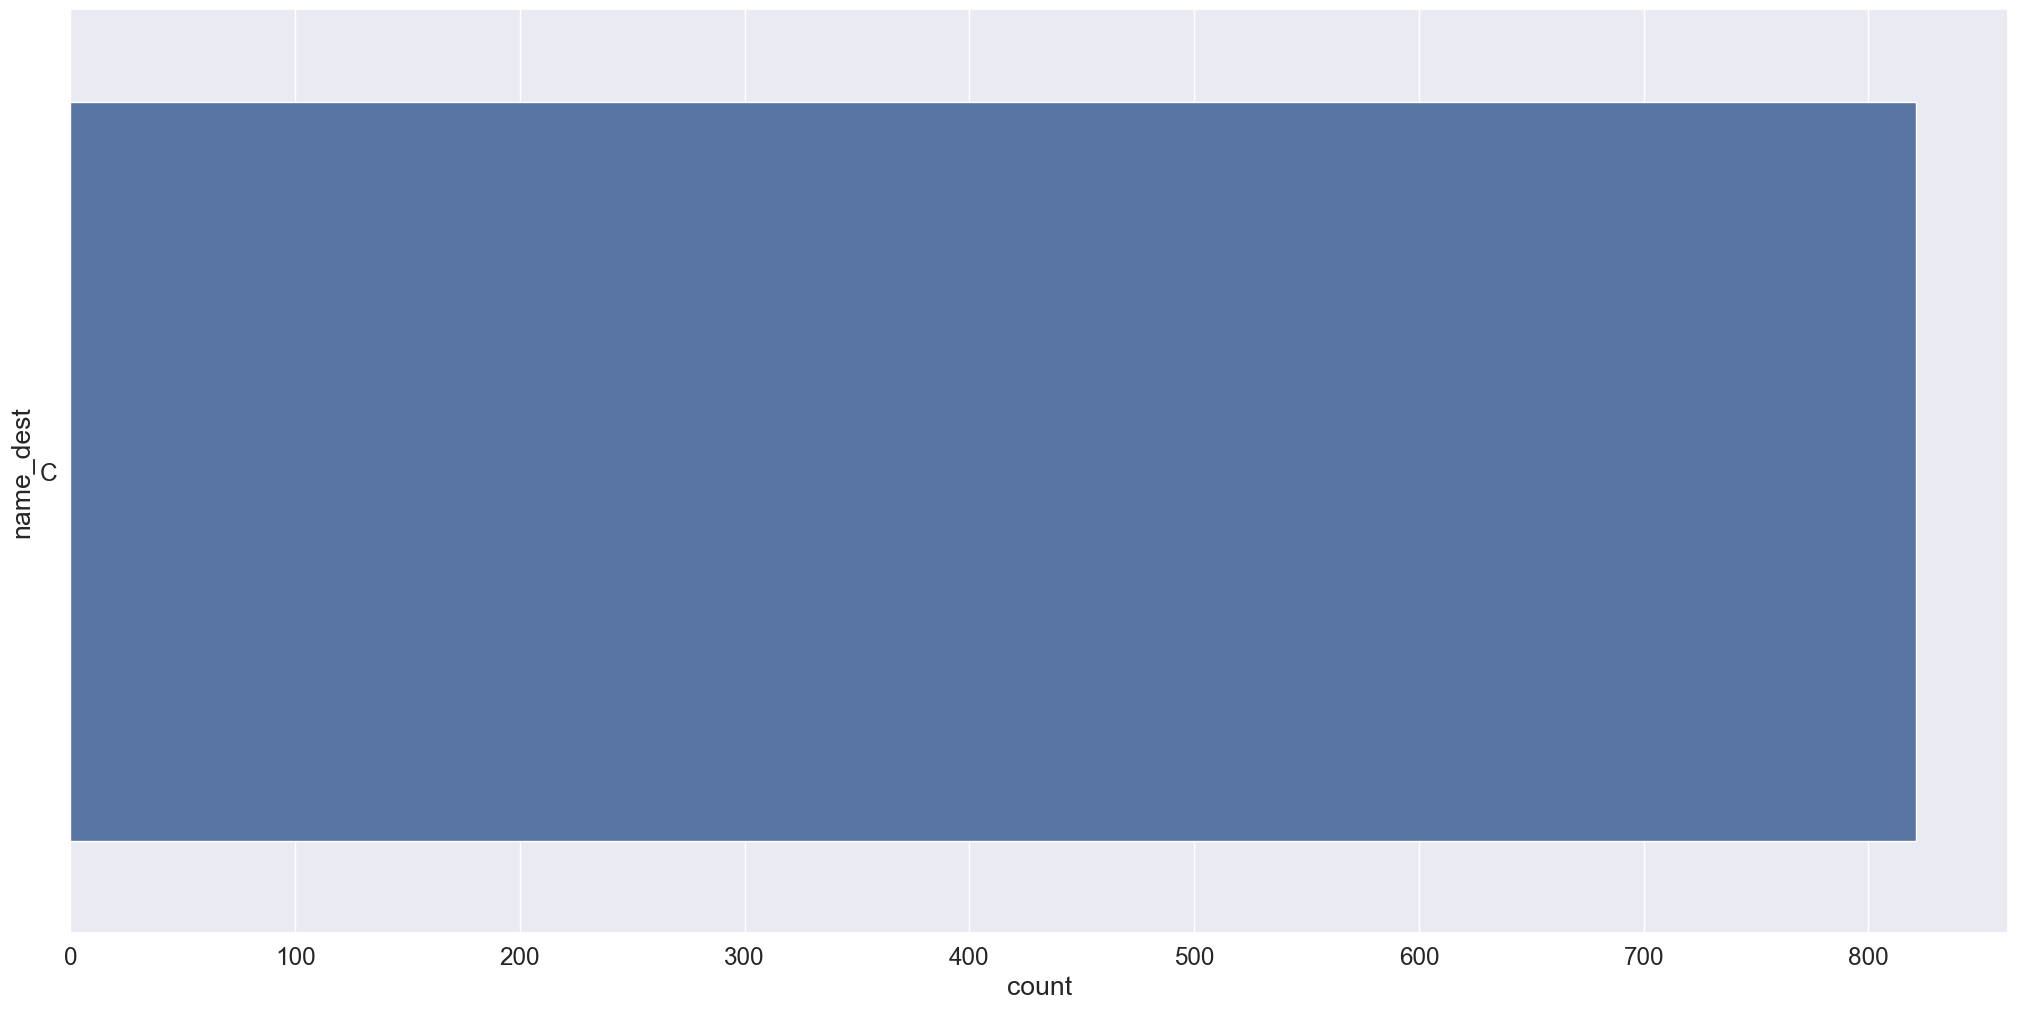

In [28]:
sns.countplot(y='name_dest', data=aux1);

### H2 All the fraud amount is greater than 10.000.

**TRUE:** The values are greater than 10.000. But it's important to note that the no-fraud values is greater than 100.000 also.

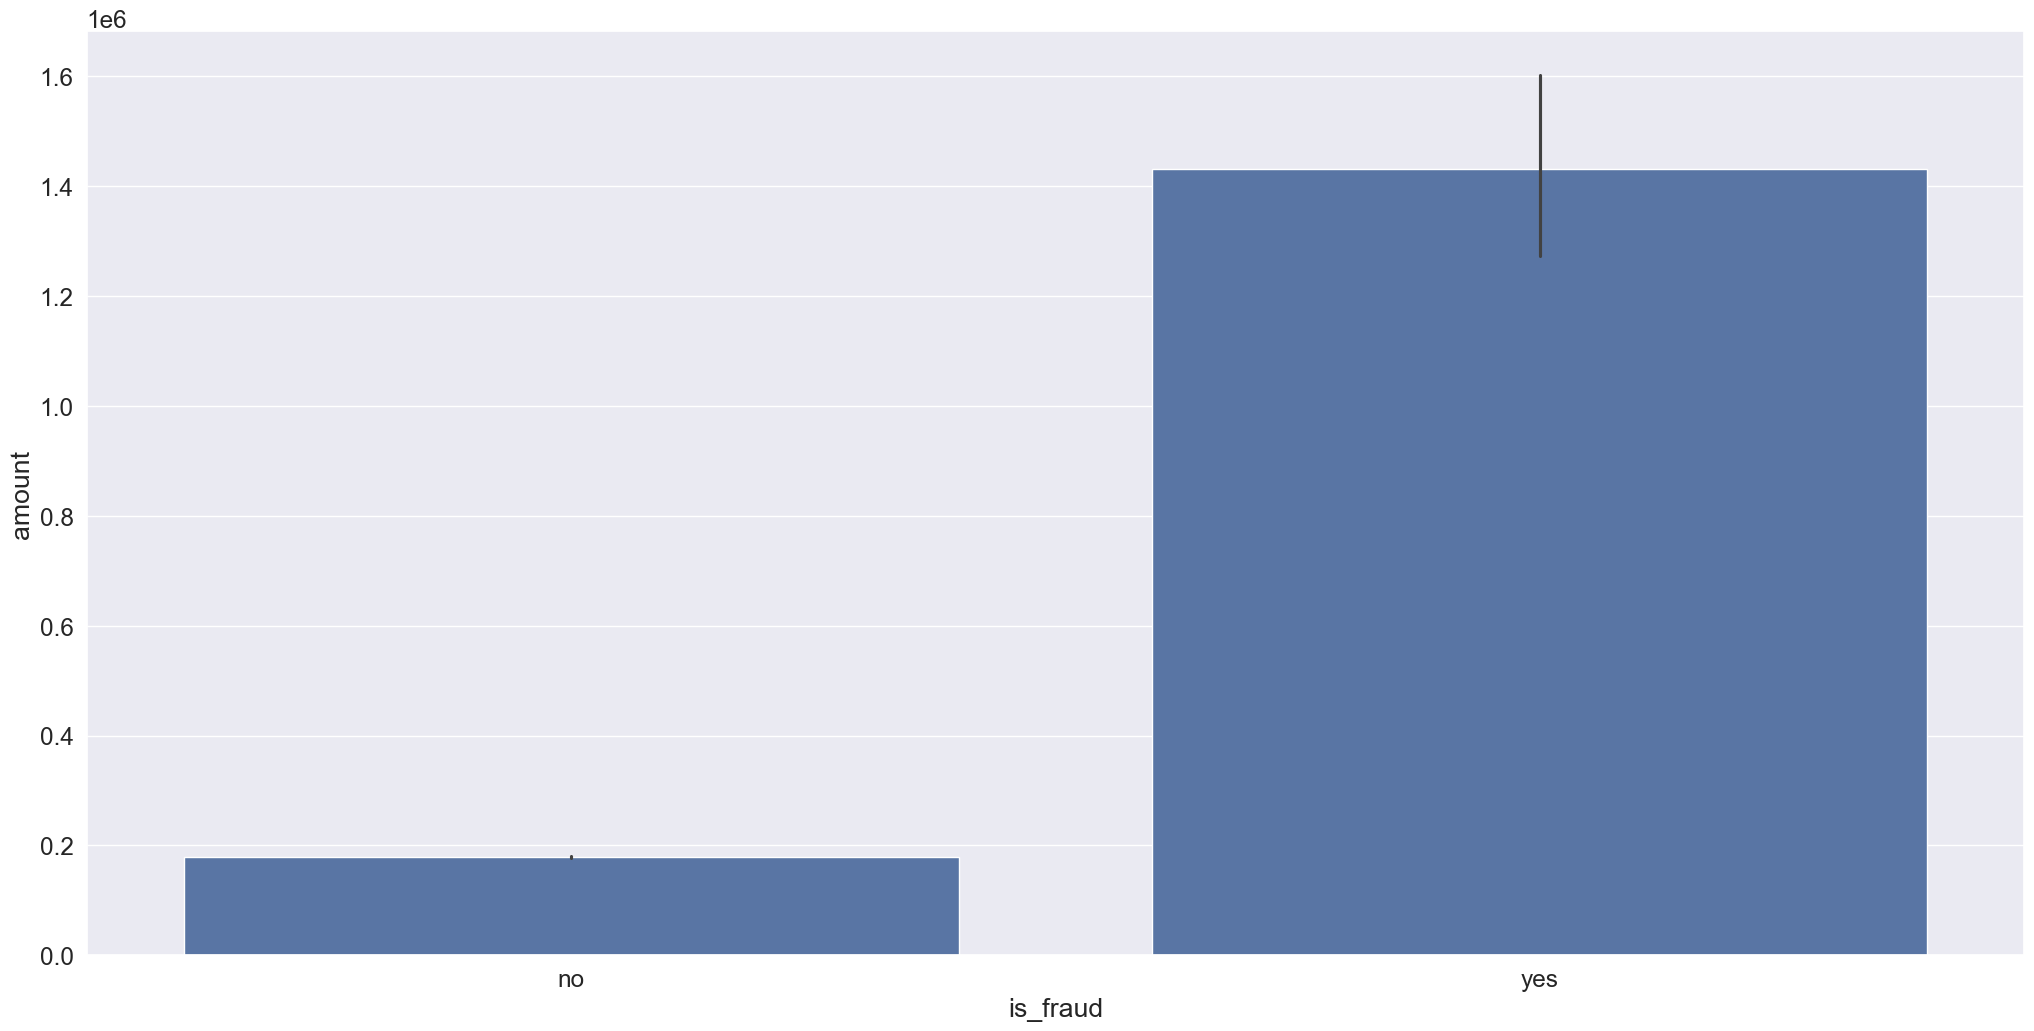

In [29]:
sns.barplot(y='amount', x='is_fraud', data=df4);

### H3 60% of fraud transaction occours using cash-out-type method.

**FALSE:** The fraud transaction occours in transfer and cash-out type. However they're almost the same value.

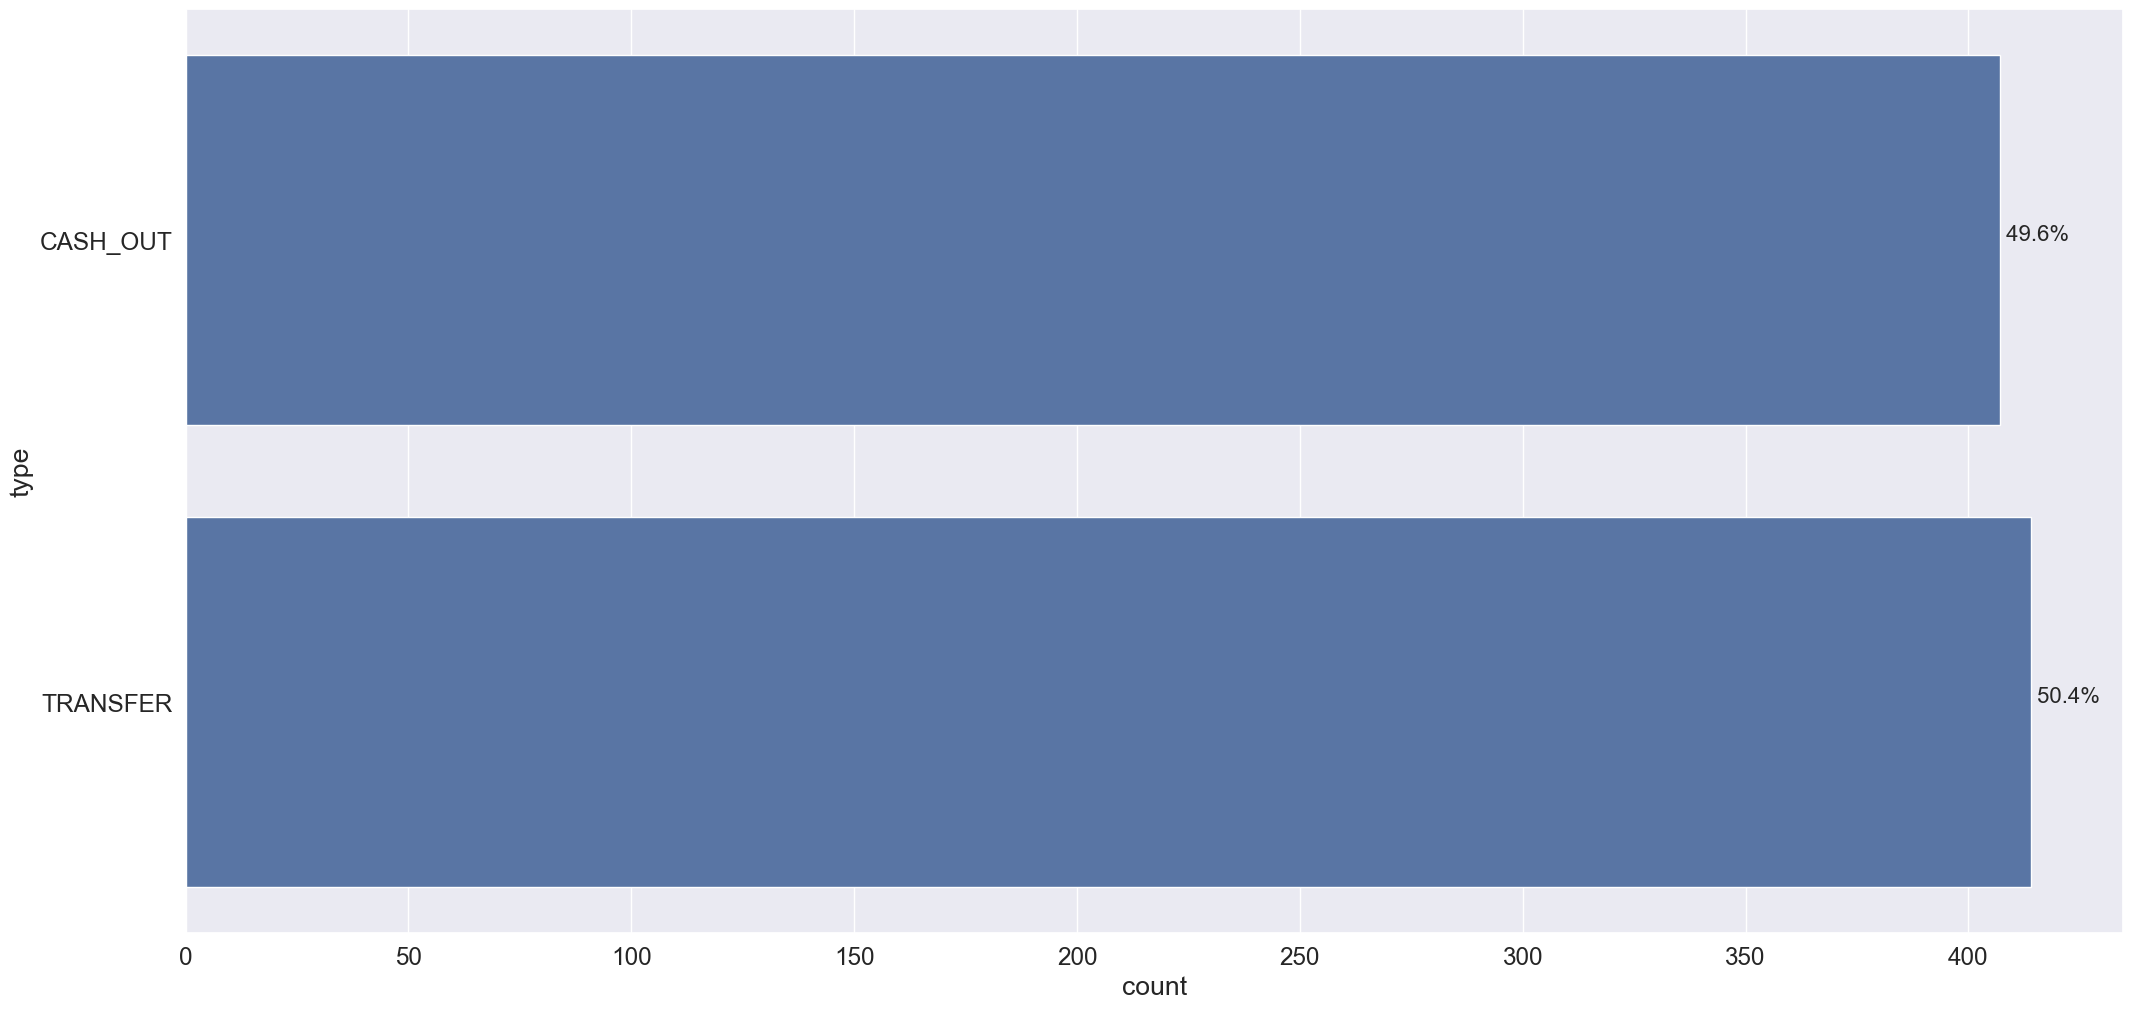

In [30]:
aux1 = df4[df4['is_fraud'] == 'yes']
ax = sns.countplot(y='type', data=aux1)

total = aux1['type'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

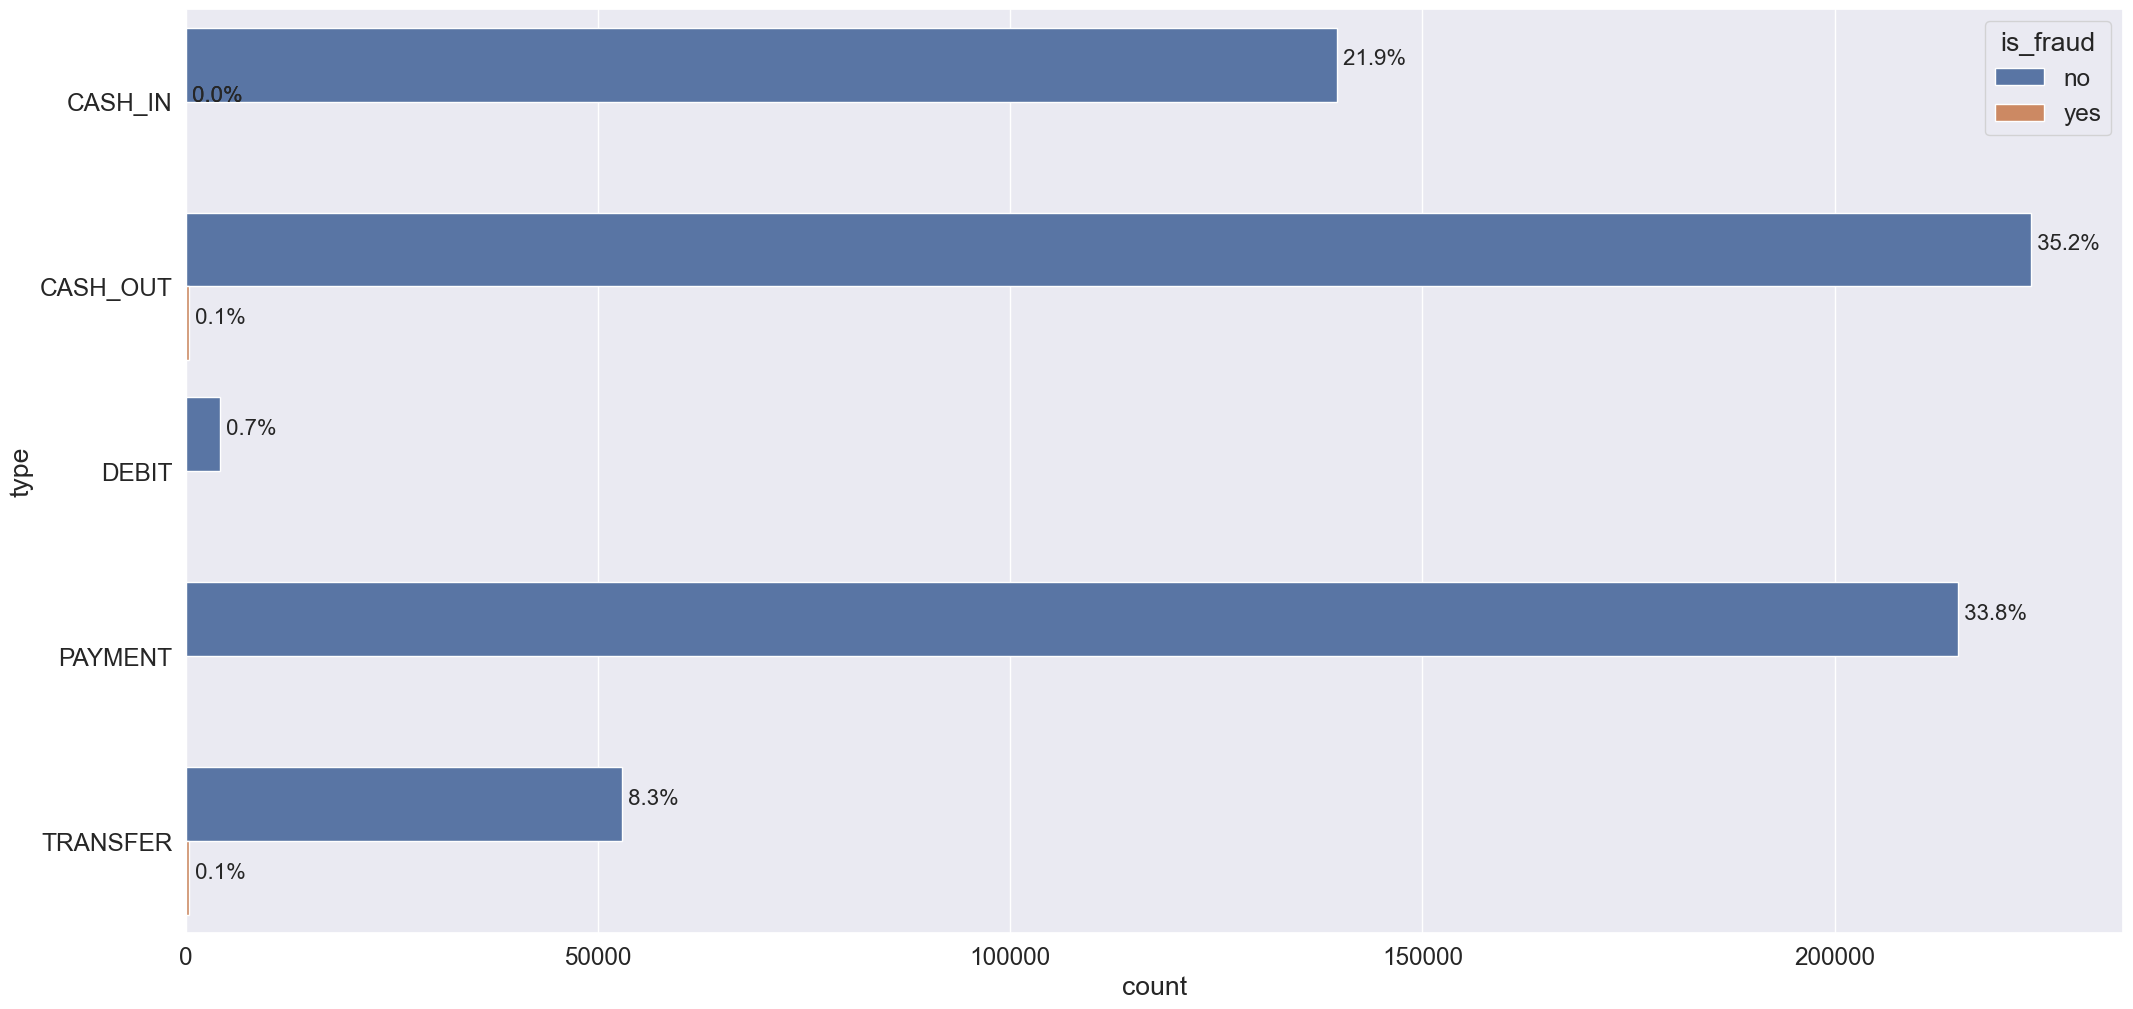

In [31]:
# For complete transaction
ax = sns.countplot(y='type', hue='is_fraud', data=df4)

total = df4['type'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### H4 Values greater than 100.000 occours using transfers-type method.
**FALSE:** The majority transactions occours in trasnfer-type, however transactions greater than 100.000 occour in cash-out and cash-in too.

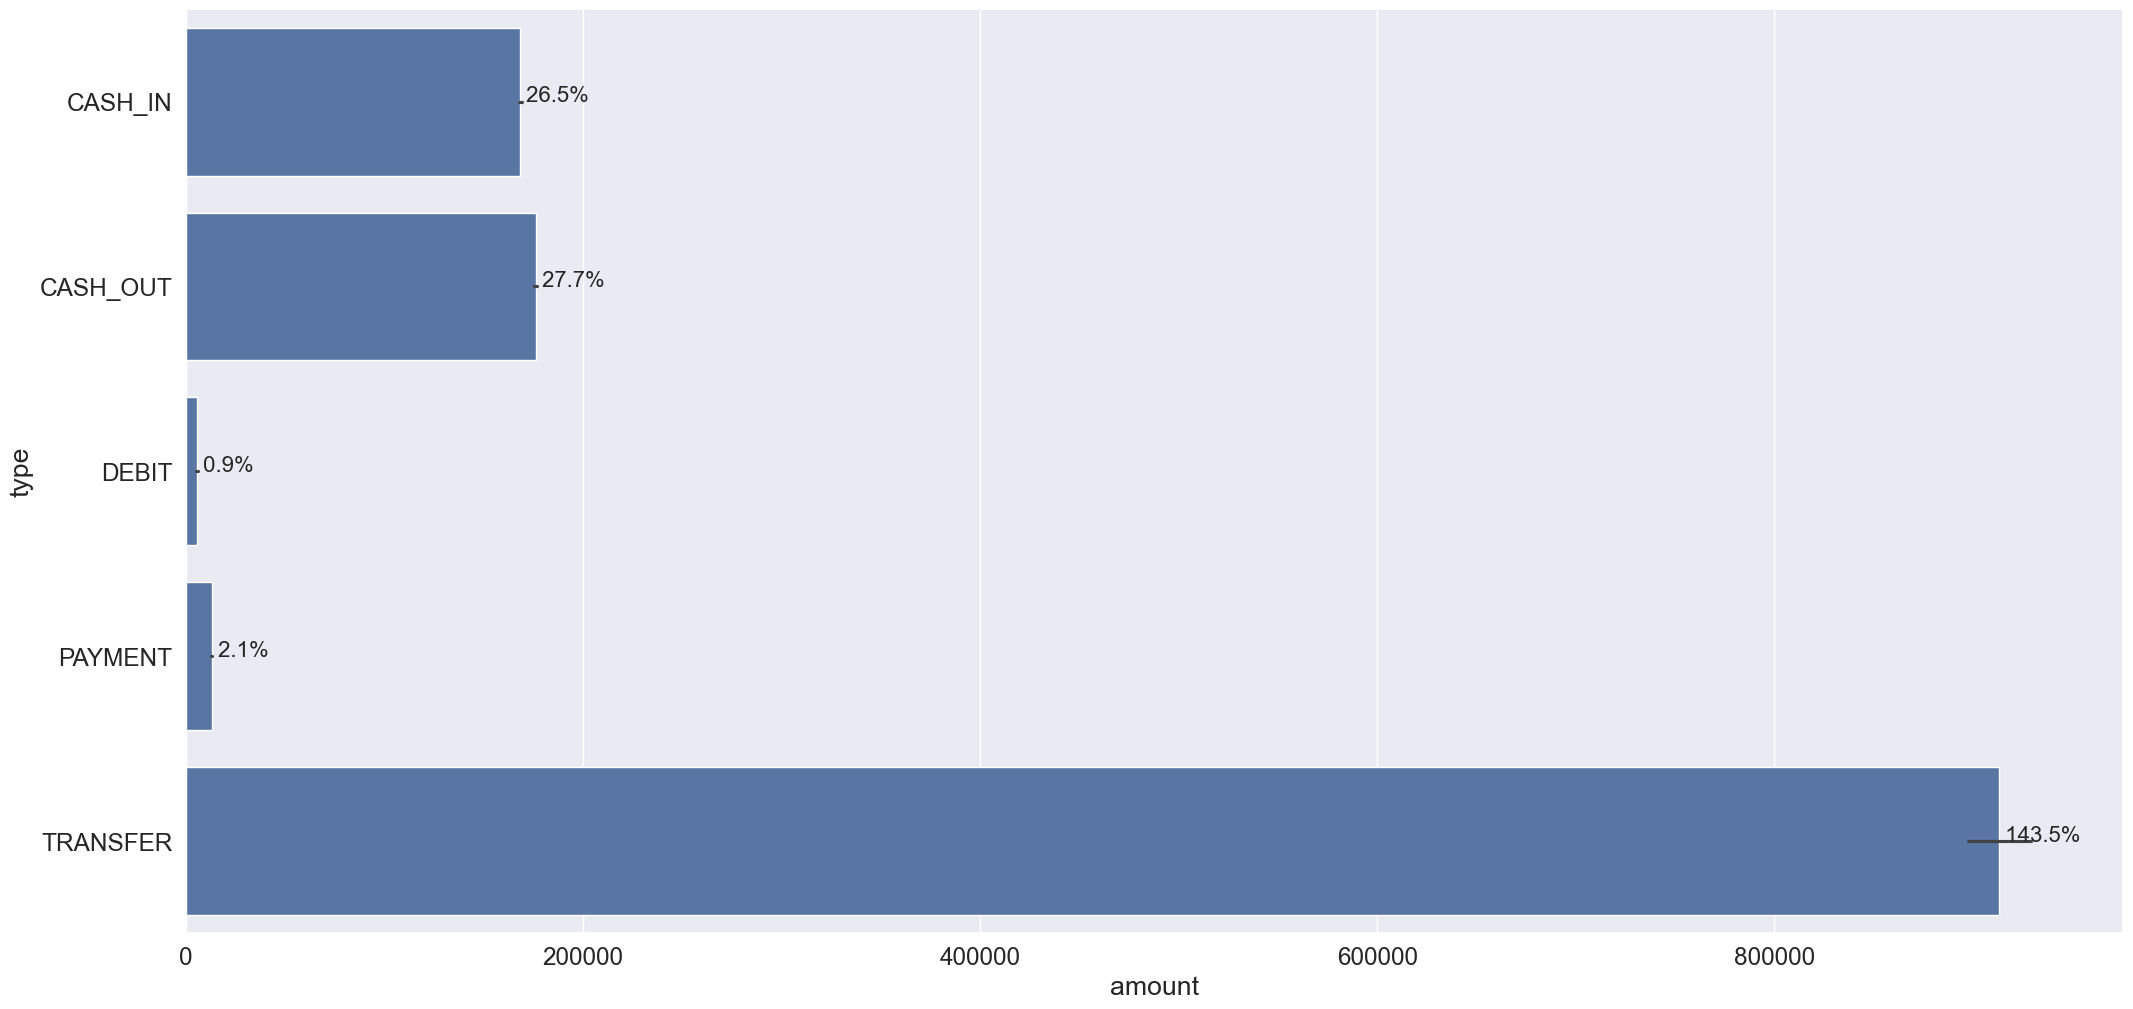

In [32]:
ax = sns.barplot(y='type', x='amount', data=df4);

total = df4['type'].size
for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### H5 Fraud transactions occours at least in 3 days.

**TRUE:** The values for transactions and days in fraud aren't similar.

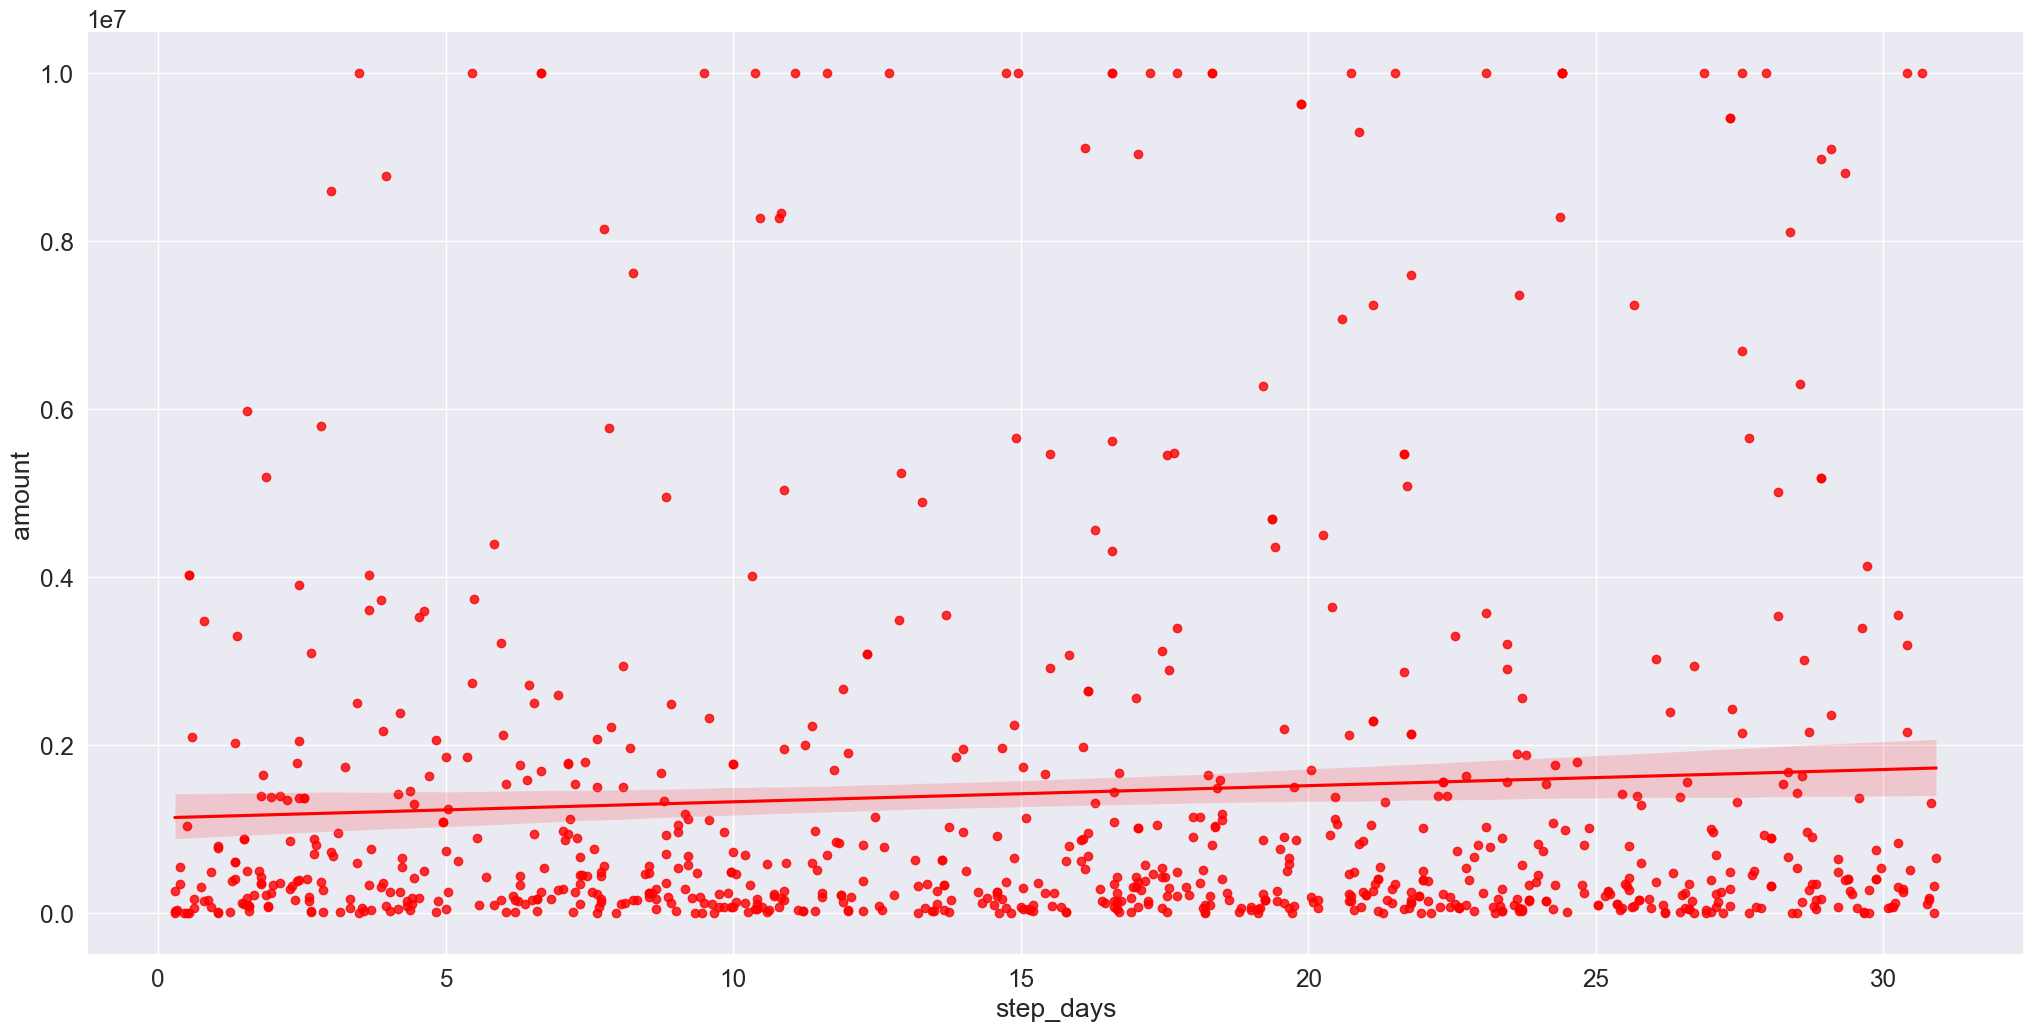

In [33]:
aux1 = df4[df4['is_fraud'] == 'yes']
sns.regplot(x='step_days', y='amount', data=aux1, color='red');

# Multivariate Analsysis


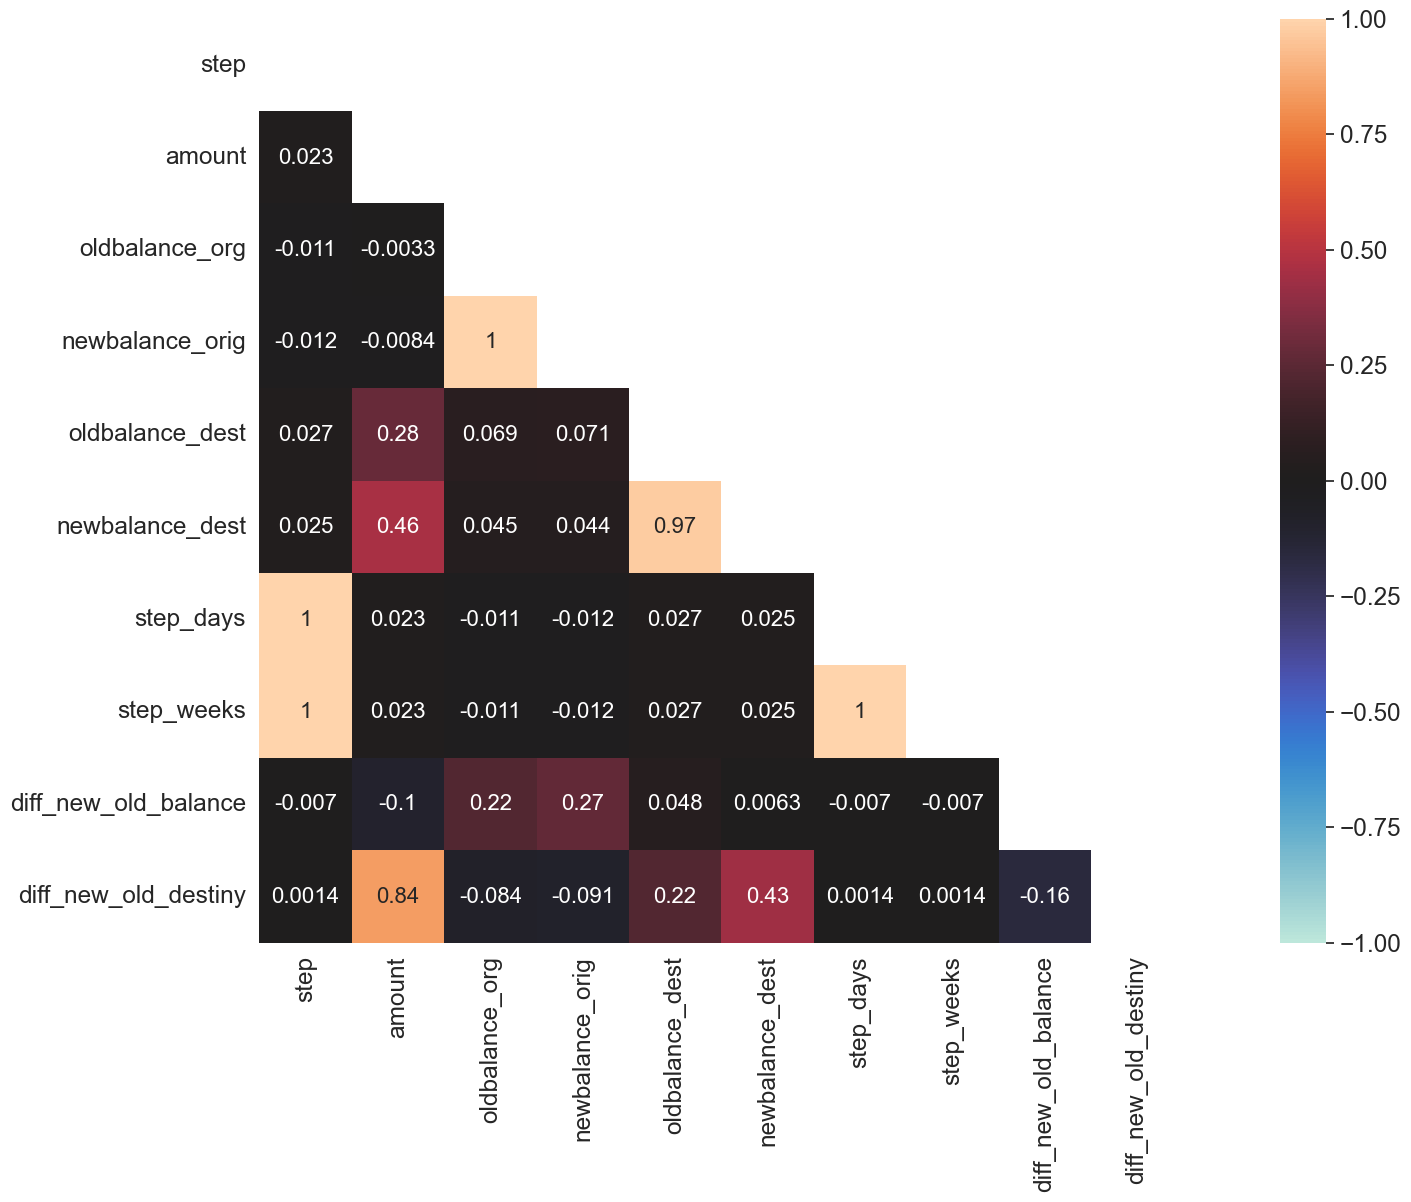

In [34]:
corr = num_attributes.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, annot=True, mask=mask, vmin=-1, center=0, vmax=1, square=True)

In [35]:
def calcCramerV(x, y):
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape
    
    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k-1)*(r-1)/(n-1))
    
    kcorr = k - (k-1)**2/(n-1)
    rcorr = r - (r-1)**2/(n-1)
    
    return np.sqrt((chi2corr/n) / (min(kcorr-1, rcorr-1)))

In [36]:
# dict_corr = {}
# columns = cat_attributes.columns.tolist()

# for column in columns:
#     dict_corr[column] = {}
    
#     for column2 in columns:
#         dict_corr[column][column2] = calcCramerV(cat_attributes[column], cat_attributes[column2])
        
# corr = pd.DataFrame(dict_corr)

In [37]:
import warnings
import inflection

import numpy             as np
import pandas            as pd
import seaborn           as sns

import matplotlib.pyplot as plt

from scipy   import stats
from boruta  import BorutaPy
from category_encoders import OneHotEncoder

from IPython.display      import Image
from IPython.core.display import HTML 

from xgboost  import XGBClassifier
# from lightgbm import LGBMClassifier

from sklearn.svm          import SVC
from sklearn.dummy        import DummyClassifier
from sklearn.ensemble     import RandomForestClassifier
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics         import balanced_accuracy_score, precision_score, classification_report
from sklearn.metrics         import recall_score, f1_score, make_scorer, cohen_kappa_score
from sklearn.preprocessing   import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

# Data Preprocessing

In [38]:
df5 = df4.copy()

In [39]:
X = df5.drop(columns=['is_fraud', 'is_flagged_fraud', 'name_orig', 'name_dest', 
                      'step_weeks', 'step_days'], axis=1)
y = df5['is_fraud'].map({'yes': 1, 'no': 0})

In [40]:
from sklearn.model_selection import train_test_split


In [41]:
# spliting into temp and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=.2, stratify=y)

# One Hot Encoding

In [ ]:
from category_encoders import OneHotEncoder
ohe = OneHotEncoder(cols=['type'], use_cat_names=True)

X_train = ohe.fit_transform(X_train)
X_valid = ohe.transform(X_valid)

X_temp = ohe.fit_transform(X_temp)
X_test = ohe.transform(X_test)

# scaling

In [44]:
num_columns = ['amount', 'oldbalance_org', 'newbalance_orig', 'oldbalance_dest', 'newbalance_dest',
               'diff_new_old_balance', 'diff_new_old_destiny']
mm = MinMaxScaler()
X_params = X_temp.copy()

X_train[num_columns] = mm.fit_transform(X_train[num_columns])
X_valid[num_columns] = mm.transform(X_valid[num_columns])

X_params[num_columns] = mm.fit_transform(X_temp[num_columns])
X_test[num_columns] = mm.transform(X_test[num_columns])

# Feature Selection Using Boruta

In [45]:
X_boruta = X_params.values
y_boruta = y_temp.values.ravel()

In [46]:
# from sklearn.ensemble import RandomForestClassifier
# boruta = BorutaPy(RandomForestClassifier(), n_estimators='auto')
# boruta.fit(X_boruta, y_boruta)

In [47]:
# cols_selected_boruta = boruta.support_.tolist()
# columns_selected = X_params.loc[:, cols_selected_boruta].columns.tolist()
# columns_selected

In [48]:
final_columns_selected = ['step', 'oldbalance_org', 
                          'newbalance_orig', 'newbalance_dest', 
                          'diff_new_old_balance', 'diff_new_old_destiny', 
                          'type_TRANSFER']

# Machine Lerning Modeling

In [49]:
X_train_cs = X_train[final_columns_selected]
X_valid_cs = X_valid[final_columns_selected]

X_temp_cs = X_temp[final_columns_selected]
X_test_cs = X_test[final_columns_selected]

X_params_cs = X_params[final_columns_selected]

# 1. Baseline Model

In [50]:
from sklearn.dummy        import DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train_cs, y_train)

y_pred = dummy.predict(X_valid_cs)

In [51]:
def ml_scores(model_name, y_true, y_pred):
    
    accuracy = balanced_accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    
    return pd.DataFrame({'Balanced Accuracy': np.round(accuracy, 3), 
                         'Precision': np.round(precision, 3), 
                         'Recall': np.round(recall, 3),
                         'F1': np.round(f1, 3),
                         'Kappa': np.round(kappa, 3)}, 
                        index=[model_name])

In [52]:
dummy_results = ml_scores('dummy', y_valid, y_pred)
dummy_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
dummy,0.5,0.0,0.0,0.0,0.0


# Classification Report
Support = The number of true instances for each class in the dataset.

In [53]:
from sklearn.metrics         import balanced_accuracy_score, precision_score, classification_report
from sklearn.metrics         import recall_score, f1_score, make_scorer, cohen_kappa_score
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101671
           1       0.00      0.00      0.00       131

    accuracy                           1.00    101802
   macro avg       0.50      0.50      0.50    101802
weighted avg       1.00      1.00      1.00    101802



### Cross Validation

In [54]:
def ml_cv_results(model_name, model, x, y, verbose=1):
    
    '''initial'''
    balanced_accuracies = []
    precisions = []
    recalls = []
    f1s = []
    kappas = []
    
    mm = MinMaxScaler()
    
    x_ = x.to_numpy()
    y_ = y.to_numpy()
    
    count = 0
    
    '''cross-validation'''
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    
    for index_train, index_test in skf.split(x_, y_):
        ## Showing the Fold
        if verbose > 0:
            count += 1
            print('Fold K=%i' % (count))
    
        ## selecting train and test
        x_train, x_test = x.iloc[index_train], x.iloc[index_test]
        y_train, y_test = y.iloc[index_train], y.iloc[index_test]
        
        ## applying the scale
        x_train = mm.fit_transform(x_train)
        x_test = mm.transform(x_test)
    
        ## training the model
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        ## saving the metrics
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        kappas.append(cohen_kappa_score(y_test, y_pred))
        
        
    '''results'''    
    accuracy_mean, accuracy_std = np.round(np.mean(balanced_accuracies), 3), np.round(np.std(balanced_accuracies), 3)
    precision_mean, precision_std = np.round(np.mean(precisions), 3), np.round(np.std(precisions), 3)
    recall_mean, recall_std = np.round(np.mean(recalls), 3), np.round(np.std(recalls), 3)
    f1_mean, f1_std = np.round(np.mean(f1s), 3), np.round(np.std(f1s), 3)
    kappa_mean, kappa_std = np.round(np.mean(kappas), 3), np.round(np.std(kappas), 3)
    
    ## saving the results in a dataframe
    return pd.DataFrame({"Balanced Accuracy": "{} +/- {}".format(accuracy_mean, accuracy_std),
                        "Precision": "{} +/- {}".format(precision_mean, precision_std),
                        "Recall": "{} +/- {}".format(recall_mean, recall_std),
                        "F1": "{} +/- {}".format(f1_mean, f1_std),
                        "Kappa": "{} +/- {}".format(kappa_mean, kappa_std)},
                       index=[model_name])

In [55]:
dummy_cv = ml_cv_results('Dummy', DummyClassifier(), X_temp, y_temp)
dummy_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
Dummy,0.5 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0


### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train_cs, y_train)

y_pred = lg.predict(X_valid_cs)

In [57]:
lg_results = ml_scores('Logistic Regression', y_valid, y_pred)
lg_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
Logistic Regression,0.504,1.0,0.008,0.015,0.015


In [58]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101671
           1       1.00      0.01      0.02       131

    accuracy                           1.00    101802
   macro avg       1.00      0.50      0.51    101802
weighted avg       1.00      1.00      1.00    101802



In [59]:
lg_cv = ml_cv_results('Logistic Regression',
                      LogisticRegression(), 
                      X_temp_cs, y_temp)
lg_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
Logistic Regression,0.518 +/- 0.007,1.0 +/- 0.0,0.037 +/- 0.014,0.07 +/- 0.026,0.07 +/- 0.026


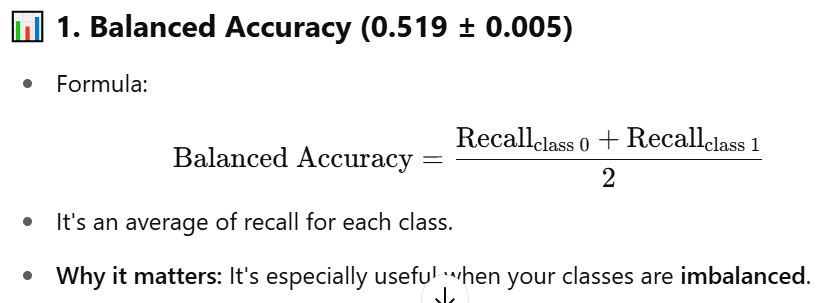

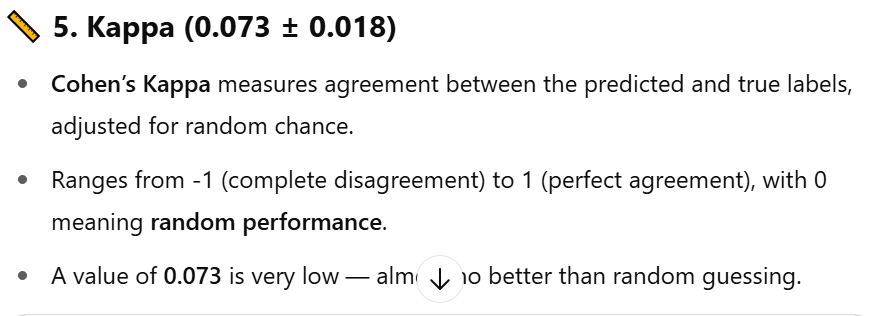

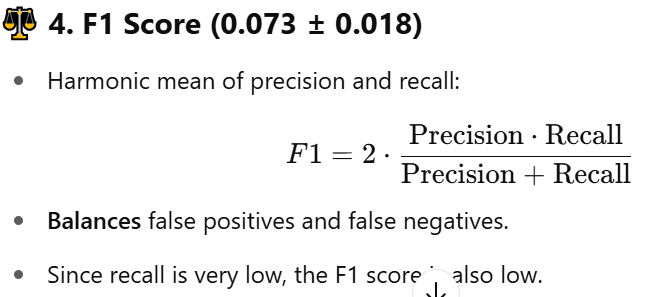

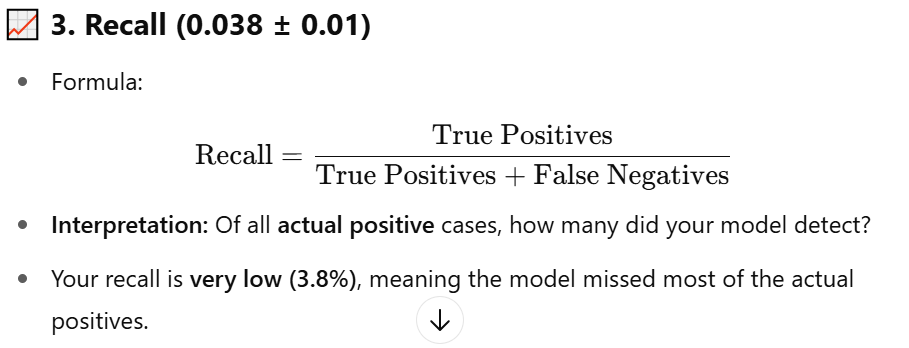

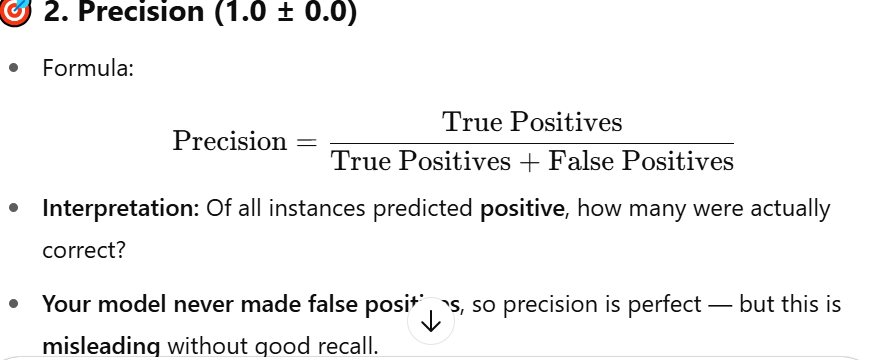

### Support Vector Machine (SVM)

In [60]:
from sklearn.svm          import SVC
svm = SVC()
svm.fit(X_train_cs, y_train)

y_pred = svm.predict(X_valid_cs)

In [61]:
svm_results = ml_scores('SVM', y_valid, y_pred)
svm_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
SVM,0.5,0.0,0.0,0.0,0.0


In [62]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101671
           1       0.00      0.00      0.00       131

    accuracy                           1.00    101802
   macro avg       0.50      0.50      0.50    101802
weighted avg       1.00      1.00      1.00    101802



In [63]:
svm_cv = ml_cv_results('SVM', SVC(), X_temp_cs, y_temp)
svm_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
SVM,0.597 +/- 0.031,1.0 +/- 0.0,0.195 +/- 0.061,0.322 +/- 0.082,0.322 +/- 0.082


### RandomForest Classifier

In [64]:
from sklearn.ensemble     import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_cs, y_train)

y_pred = rf.predict(X_valid_cs)

In [65]:
rf_results = ml_scores('Random Forest', y_valid, y_pred)
rf_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
Random Forest,0.844,0.978,0.687,0.807,0.807


In [66]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101671
           1       0.98      0.69      0.81       131

    accuracy                           1.00    101802
   macro avg       0.99      0.84      0.90    101802
weighted avg       1.00      1.00      1.00    101802



In [67]:
rf_cv = ml_cv_results('Random Forest', 
                      RandomForestClassifier(), 
                      X_temp_cs, y_temp)
rf_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
Random Forest,0.868 +/- 0.017,0.968 +/- 0.018,0.735 +/- 0.035,0.835 +/- 0.028,0.835 +/- 0.028


### XGBOOST Classification

In [68]:
from xgboost  import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_cs, y_train)

y_pred = xgb.predict(X_valid_cs)


In [69]:
xgb_results = ml_scores('XGBoost', y_valid, y_pred)
xgb_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
XGBoost,0.863,0.96,0.725,0.826,0.826


In [70]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101671
           1       0.96      0.73      0.83       131

    accuracy                           1.00    101802
   macro avg       0.98      0.86      0.91    101802
weighted avg       1.00      1.00      1.00    101802



In [71]:
xgb_cv = ml_cv_results('XGBoost', XGBClassifier(),
                       X_temp_cs, y_temp)
xgb_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
XGBoost,0.878 +/- 0.019,0.922 +/- 0.017,0.756 +/- 0.037,0.831 +/- 0.026,0.83 +/- 0.027


### KNN K-nearest Neighbours

In [72]:
from sklearn.neighbors    import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_cs, y_train)

y_pred = knn.predict(X_valid_cs)

In [73]:
knn_results = ml_scores('K Nearest Neighbors', y_valid, y_pred)
knn_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
K Nearest Neighbors,0.599,1.0,0.198,0.331,0.331


In [74]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101671
           1       1.00      0.20      0.33       131

    accuracy                           1.00    101802
   macro avg       1.00      0.60      0.67    101802
weighted avg       1.00      1.00      1.00    101802



In [75]:
knn_cv = ml_cv_results('K Nearest Neighbors', KNeighborsClassifier(), 
                       X_temp_cs, y_temp)
knn_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
K Nearest Neighbors,0.696 +/- 0.015,0.963 +/- 0.02,0.391 +/- 0.03,0.556 +/- 0.029,0.555 +/- 0.029


### Comparing Model Performance

#### Single Performance

In [76]:
modeling_performance = pd.concat([dummy_results, lg_results, knn_results, 
                                  rf_results, xgb_results,
                                 svm_results])
modeling_performance.sort_values(by="F1", ascending=True)

,Balanced Accuracy,Precision,Recall,F1,Kappa
dummy,0.500,0.000,0.000,0.000,0.000
SVM,0.500,0.000,0.000,0.000,0.000
Logistic Regression,0.504,1.000,0.008,0.015,0.015
K Nearest Neighbors,0.599,1.000,0.198,0.331,0.331
Random Forest,0.844,0.978,0.687,0.807,0.807
XGBoost,0.863,0.960,0.725,0.826,0.826


#### Cross Validation Performance

In [77]:
modeling_performance_cv = pd.concat([dummy_cv, lg_cv, knn_cv, rf_cv, 
                                     xgb_cv, svm_cv])

modeling_performance_cv.sort_values(by="F1", ascending=True)

,Balanced Accuracy,Precision,Recall,F1,Kappa
Dummy,0.5 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0,0.0 +/- 0.0
Logistic Regression,0.518 +/- 0.007,1.0 +/- 0.0,0.037 +/- 0.014,0.07 +/- 0.026,0.07 +/- 0.026
SVM,0.597 +/- 0.031,1.0 +/- 0.0,0.195 +/- 0.061,0.322 +/- 0.082,0.322 +/- 0.082
K Nearest Neighbors,0.696 +/- 0.015,0.963 +/- 0.02,0.391 +/- 0.03,0.556 +/- 0.029,0.555 +/- 0.029
XGBoost,0.878 +/- 0.019,0.922 +/- 0.017,0.756 +/- 0.037,0.831 +/- 0.026,0.83 +/- 0.027
Random Forest,0.868 +/- 0.017,0.968 +/- 0.018,0.735 +/- 0.035,0.835 +/- 0.028,0.835 +/- 0.028


## Hyper Parameter Tuning

In [78]:
f1 = make_scorer(f1_score)
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold

In [79]:
params = {
    'booster': ['gbtree', 'gblinear', 'dart'],
    'eta': [0.3, 0.1, 0.01],
    'scale_pos_weight': [1, 774, 508, 99]
}

In [80]:
#pip install --upgrade xgboost

In [81]:
gs = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=params,
    scoring='f1_macro',  # Use this for multiclass or imbalanced binary
    cv=StratifiedKFold(n_splits=5),
    n_jobs=-1,  # Run in parallel (optional)
    verbose=1   # Shows progress
)

# Fit the model
gs.fit(X_params_cs, y_temp)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     gr...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree', 'gblinear', 'dart'],
                         'eta': [0.3, 0.1, 0.01],
                         'scale_pos_weight': [1, 774, 508, 99]},
             scoring='f1_macro', verbose=1)

In [82]:
best_params = gs.best_params_
best_params

{'booster': 'gbtree', 'eta': 0.1, 'scale_pos_weight': 1}

In [86]:
best_params = {'booster': 'gbtree', 'eta': 0.1, 'scale_pos_weight': 1}

In [87]:
gs.best_score_

np.float64(0.916099159305262)

In [85]:
import xgboost
import sklearn

print("xgboost:", xgboost.__version__)
print("scikit-learn:", sklearn.__version__)

xgboost: 3.0.2
scikit-learn: 1.6.0


In [88]:
xgb_gs = XGBClassifier(
    booster=best_params['booster'],
    eta=best_params['eta'],
    scale_pos_weight=best_params['scale_pos_weight']
)

In [89]:
xgb_gs.fit(X_train_cs, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [90]:
y_pred = xgb_gs.predict(X_valid_cs)

In [91]:
# Single Result
xgb_gs_results = ml_scores('XGBoost GS', y_valid, y_pred)
xgb_gs_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
XGBoost GS,0.836,0.978,0.672,0.796,0.796


In [92]:
# Cross validation Resule
xgb_gs_cv = ml_cv_results('XGBoost GS', xgb_gs, X_temp_cs, y_temp)
xgb_gs_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
XGBoost GS,0.874 +/- 0.009,0.954 +/- 0.023,0.749 +/- 0.017,0.839 +/- 0.012,0.839 +/- 0.012


## Conclusion

### Final Model

In [93]:
final_model = XGBClassifier(
    booster=best_params['booster'],
    eta=best_params['eta'],
    scale_pos_weight=best_params['scale_pos_weight']
)

final_model.fit(X_params_cs, y_temp)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, ...)

### Unseen Data Score

In [94]:
y_pred = final_model.predict(X_test_cs)

In [95]:
unseen_scores = ml_scores('unseen', y_test, y_pred)
unseen_scores

,Balanced Accuracy,Precision,Recall,F1,Kappa
unseen,0.909,0.964,0.817,0.884,0.884


# Model Deploy
#### Saving

In [101]:
final_model = joblib.load('model_cycle1.pkl')

In [99]:
import joblib

joblib.dump(mm, 'minmaxscaler_cycle1.pkl')


['minmaxscaler_cycle1.pkl']

In [102]:
joblib.dump(ohe, 'onehotencoder_cycle1.joblib')

['onehotencoder_cycle1.joblib']

In [104]:
import pickle

with open('onehotencoder_cycle1.pkl', 'wb') as f:
    pickle.dump(ohe, f)


In [106]:
final_model = XGBClassifier(
    booster=best_params['booster'],
    eta=best_params['eta'],
    scale_pos_weight=best_params['scale_pos_weight']
)

final_model.fit(X_params_cs, y_temp)

joblib.dump(final_model, 'model_cycle1.joblib')

['model_cycle1.joblib']

In [108]:
mm = MinMaxScaler()
mm.fit(X_params_cs, y_temp)

joblib.dump(mm, 'minmaxscaler_cycle1.joblib')

['minmaxscaler_cycle1.joblib']

In [141]:
import joblib
import inflection
import pandas as pd

class Fraud:
    
    def __init__(self):
        self.minmaxscaler = joblib.load('../parameters/minmaxscaler_cycle1.joblib')
        self.onehotencoder = joblib.load('../parameters/onehotencoder_cycle1.joblib')
        
    def data_cleaning(self, df1):
        cols_old = df1.columns.tolist()
        
        snakecase = lambda i: inflection.underscore(i)
        cols_new = list(map(snakecase, cols_old))
        
        df1.columns = cols_new
        
        return df1
    
    def feature_engineering(self, df2):
        # step
        df2['step_days'] = df2['step'].apply(lambda i: i/24)
        df2['step_weeks'] = df2['step'].apply(lambda i: i/(24*7))

        # difference between initial balance before the transaction and new balance after the transaction
        df2['diff_new_old_balance'] = df2['newbalance_orig'] - df2['oldbalance_org']

        # difference between initial balance recipient before the transaction and new balance recipient after the transaction.
        df2['diff_new_old_destiny'] = df2['newbalance_dest'] - df2['oldbalance_dest']

        # name orig and name dest
        df2['name_orig'] = df2['name_orig'].apply(lambda i: i[0])
        df2['name_dest'] = df2['name_dest'].apply(lambda i: i[0])
        
        return df2.drop(columns=['name_orig', 'name_dest', 
                      'step_weeks', 'step_days'], axis=1)
    
    def data_preparation(self, df3):
        # OneHotEncoder
        df3 = self.onehotencoder.transform(df3)

        # Rescaling 
        num_columns = ['amount', 'oldbalance_org', 'newbalance_orig', 'oldbalance_dest', 
                       'newbalance_dest', 'diff_new_old_balance', 'diff_new_old_destiny']
        df3[num_columns] = self.minmaxscaler.transform(df3[num_columns])
        
        # selected columns
        final_columns_selected = ['step', 'oldbalance_org', 'newbalance_orig', 'newbalance_dest', 
                                  'diff_new_old_balance', 'diff_new_old_destiny', 'type_TRANSFER']
        return df3[final_columns_selected]
    
    def get_prediction(self, model, original_data, test_data):
        pred = model.predict(test_data)
        original_data['prediction'] = pred
        
        return original_data.to_json(orient="records", date_format="iso")

In [146]:
X_train_cs.head()

,step,oldbalance_org,newbalance_orig,newbalance_dest,diff_new_old_balance,diff_new_old_destiny,type_TRANSFER
533511,299,0.001146,0.001783,0.000000,0.883052,0.069787,0
192995,254,0.000000,0.000000,0.000000,0.880601,0.069787,0
193066,325,0.006136,0.002771,0.009488,0.867652,0.071439,0
424414,209,0.000000,0.000000,0.000000,0.880601,0.069787,0
635549,351,0.000284,0.003746,0.000000,0.893914,0.069787,0
